# Regression Modelling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Linear Regression Model / Insurance Forecast

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv', sep=",", header=0)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

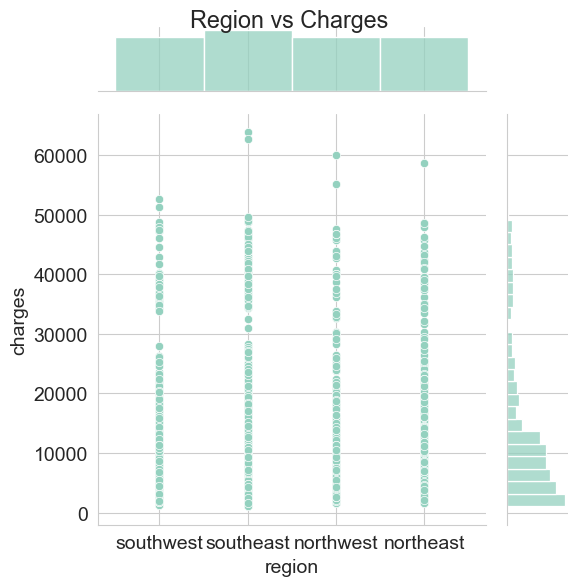

In [96]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
p=sns.jointplot(x='region',y='charges',data=data)
p.fig.suptitle('Region vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

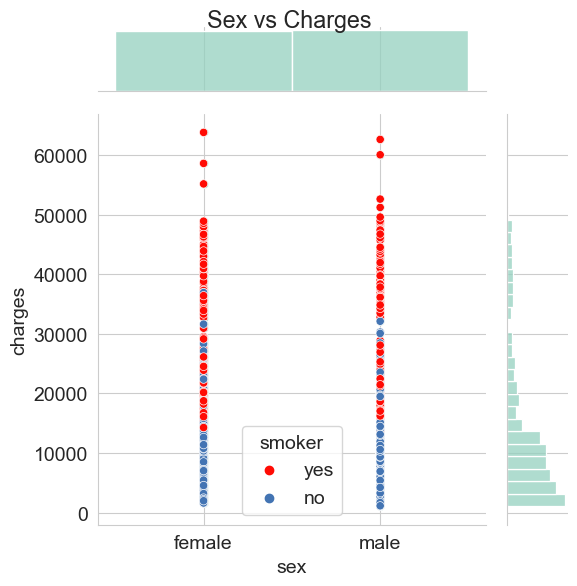

In [97]:
p=sns.jointplot(x='sex',y='charges',data=data)
p.fig.suptitle('Sex vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=data)

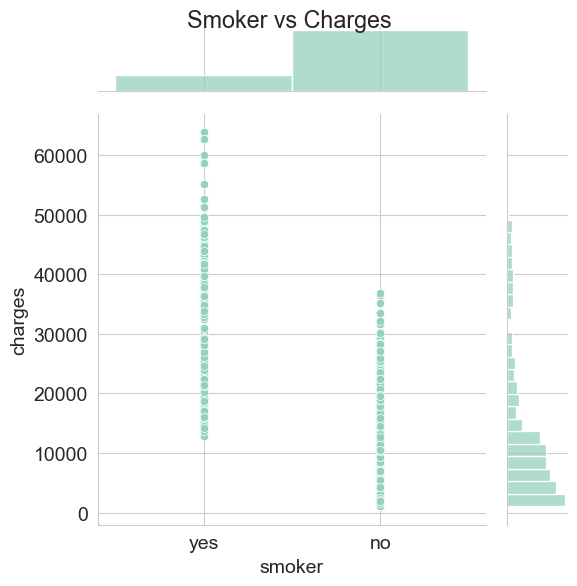

In [98]:
sns.set_palette("GnBu_d")
p=sns.jointplot(x='smoker',y='charges',data=data)
p.fig.suptitle('Smoker vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

# The smokers have higher medical cost, and only the smokers have the cost over $40,000.

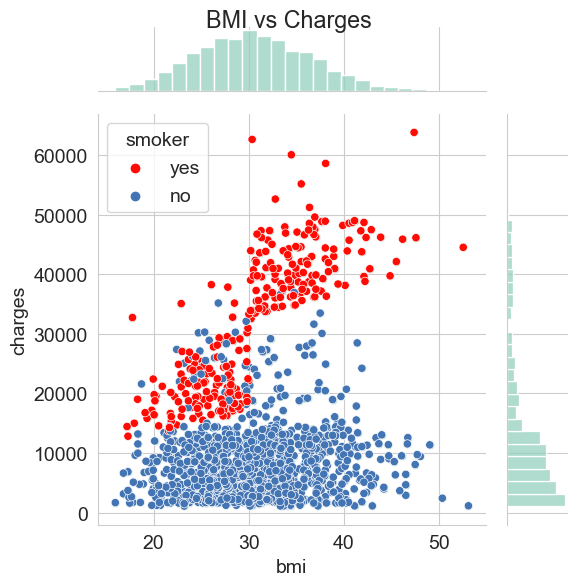

In [99]:
p=sns.jointplot(x='bmi',y='charges',data=data)
p.fig.suptitle('BMI vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=data)

# The distribution of BMI seems to be normal distribution.

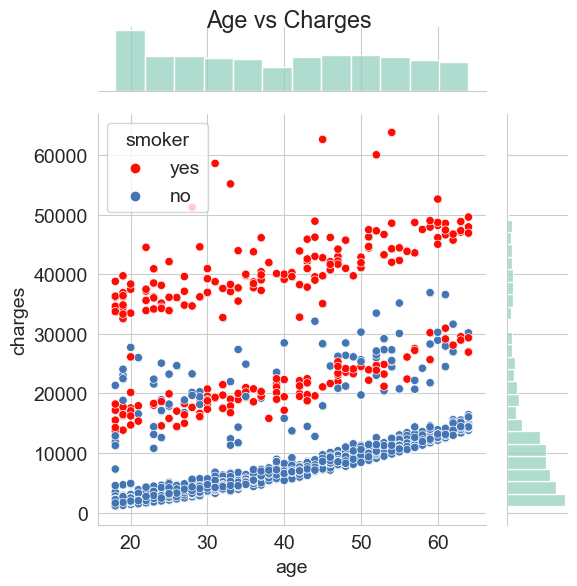

In [100]:
sns.set_palette("GnBu_d")
p=sns.jointplot(x='age',y='charges',data=data)
p.fig.suptitle('Age vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=data)

# Apply our assumption about risk groups by using K-means Clustering

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

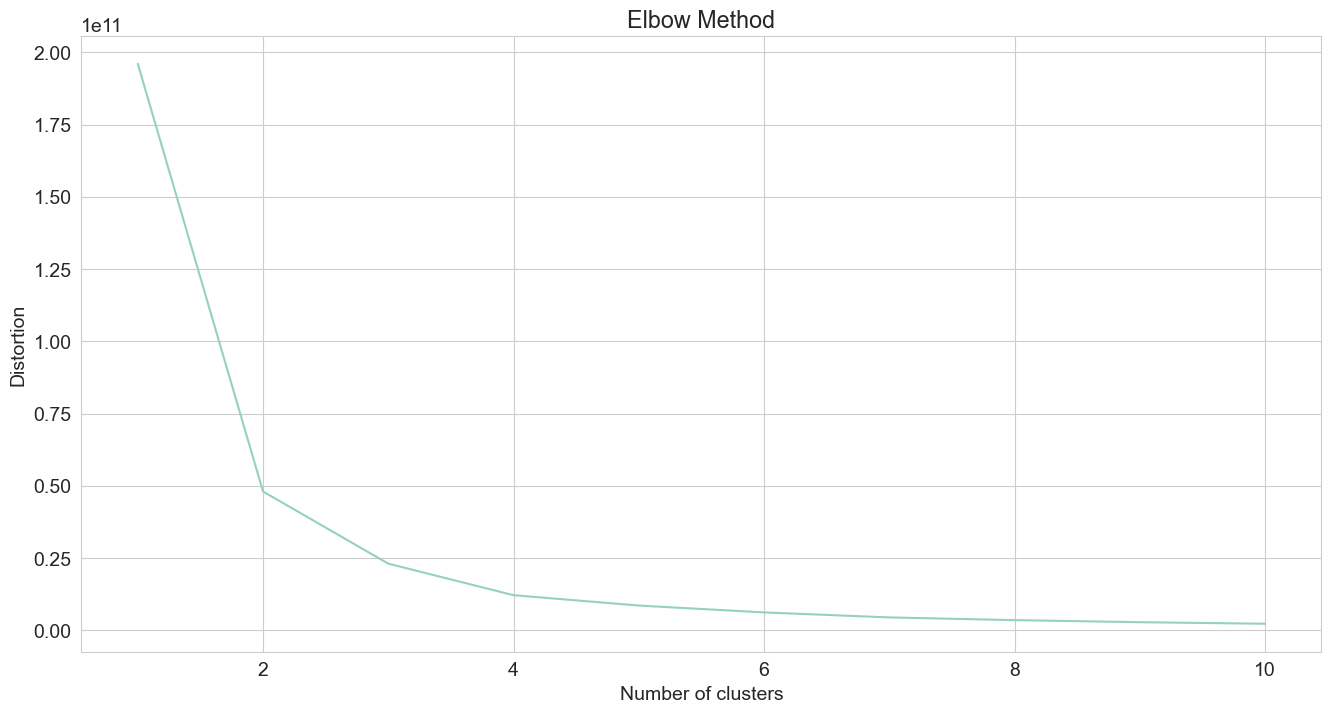

In [102]:
from sklearn.cluster import KMeans
sns.set_palette("GnBu_d")
Distortion = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[['age','bmi','charges']])
    Distortion.append(kmeans.inertia_)
plt.plot(range(1, 11), Distortion)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [95]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,0.581751,13270.422265
std,14.049960,6.098187,0.558325,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,0.693147,9382.033000
75%,51.000000,34.693750,1.098612,16639.912515
max,64.000000,53.130000,1.791759,63770.428010


In [55]:
data.corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_24968\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Label and load medical risk levels into the data

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


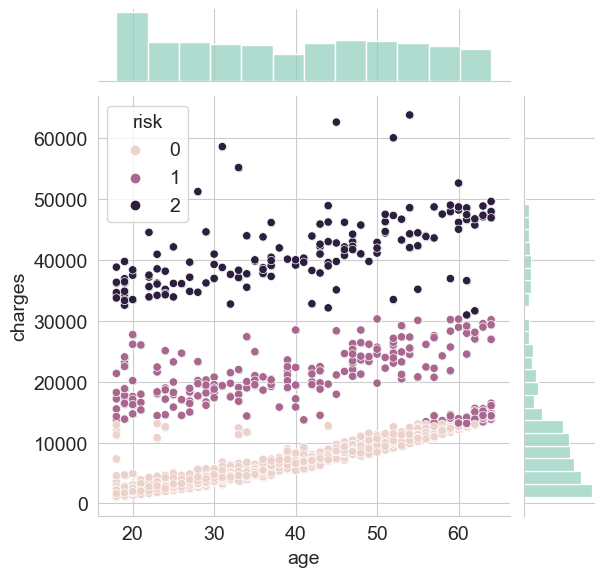

In [104]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data[['age','bmi','charges']])
data['risk']=pred_y
grid=sns.jointplot(x='age',y='charges',data=data)
g = grid.plot_joint(sns.scatterplot, hue='risk', data=data)

# Model bulding

In [106]:
# let's turn the categorical variables into dummy variabls(a series of zeros and ones)
d=pd.get_dummies(data)
d.head()

,age,bmi,children,charges,risk,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0.000000,16884.92400,1,1,0,0,1,0,0,0,1
1,18,33.770,0.693147,1725.55230,0,0,1,1,0,0,0,1,0
2,28,33.000,1.386294,4449.46200,0,0,1,1,0,0,0,1,0
3,33,22.705,0.000000,21984.47061,1,0,1,1,0,0,1,0,0
4,32,28.880,0.000000,3866.85520,0,0,1,1,0,0,1,0,0


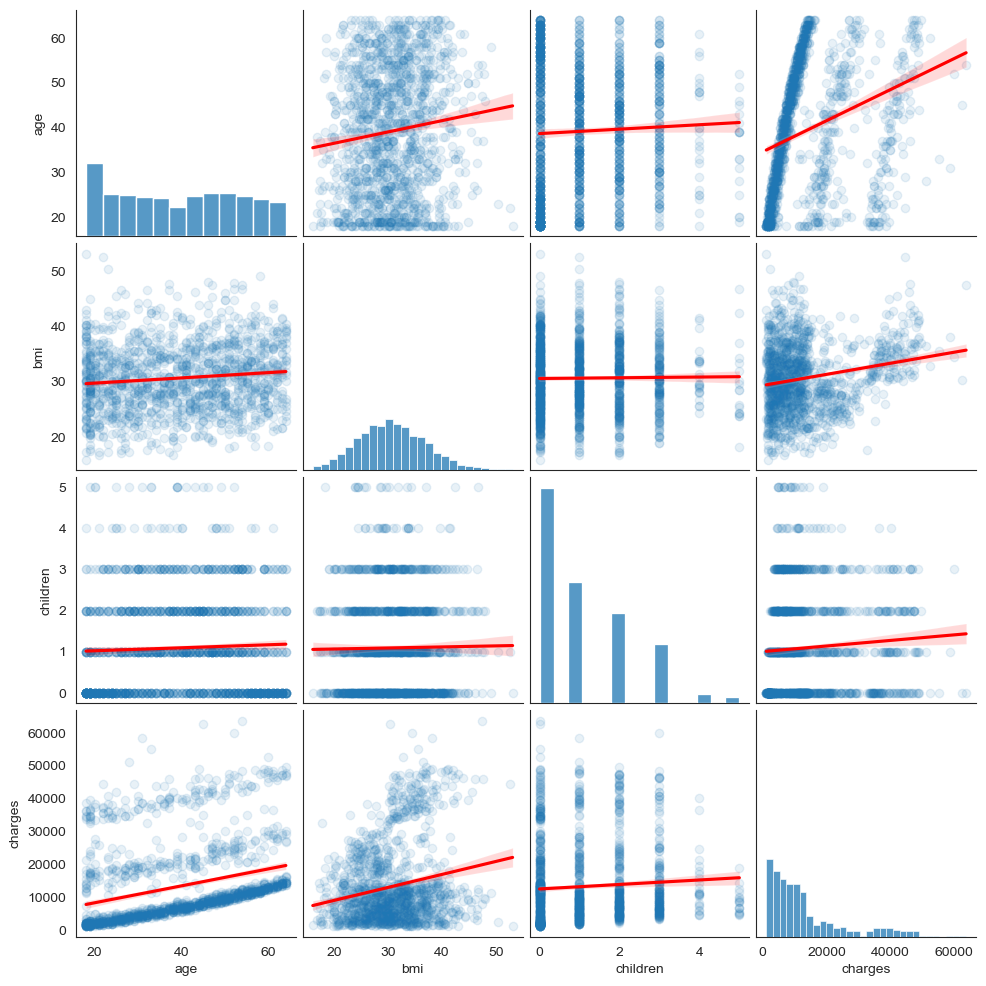

In [31]:
sns.set_style("white")
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

In [32]:
r = np.corrcoef(data.bmi,data.age)
r

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

In [33]:
r = np.corrcoef(data.age,data.charges)
r

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [34]:
r = np.corrcoef(data.bmi,data.charges)
r

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

# Simple Linear Regression

In [35]:
X = data.age.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = data.charges.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

The regression line is y = 3165.89 + 257.723 x


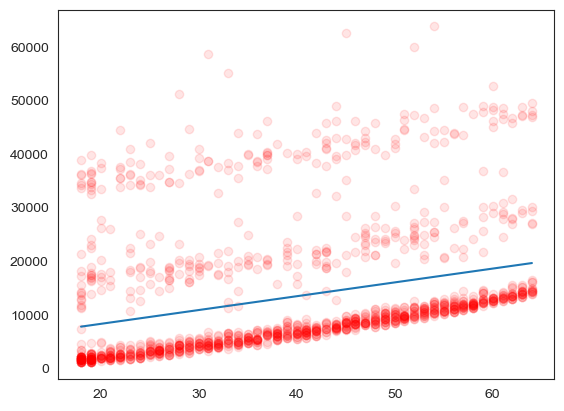

In [36]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro', alpha = 0.1)
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

In [37]:
model_DF0 = LinearRegression(fit_intercept=True)
X = data.age.values[:, np.newaxis]
Y = data.charges.values
model_DF0 = LinearRegression(fit_intercept=True)
DF0_fit = model_DF0.fit(X, Y)

In [38]:
b1 = DF0_fit.coef_[0]
b0 = DF0_fit.intercept_
print("b0 = {:.6}, b1 = {:.6}".format(b0, b1))

b0 = 3165.89, b1 = 257.723


In [39]:
model_DF0_resid = Y - DF0_fit.predict(X)

In [40]:
# The sample size
n = len(data)
# Uncomment the following line to see that the mean of the residuals is 0
# print(model_DF_resid.mean())
resid_variance = (model_DF0_resid**2).sum() / (n - 2)
print("The residual variance for this data and regression line is {:.6}".format(resid_variance))

The residual variance for this data and regression line is 1.33641e+08


In [41]:
b0_variance = resid_variance * (1 / n + X.mean()**2/ ((X - X.mean())**2).sum())
b1_variance = resid_variance / ((n - 1) * X.std(ddof = 1)**2)

b0_se = np.sqrt(b0_variance) 
b1_se = np.sqrt(b1_variance)

print("b0_se = {:.6}".format(b0_se))
print("b1_se = {:.6}".format(b1_se))

b0_se = 937.149
b1_se = 22.5024


In [42]:
alpha = 0.05
talpha = stats.t.isf(alpha / 2, df = n - 2)

CI_beta1 = b1 + np.array([-1, 1]) * talpha * b1_se

print("The confidence interval for the regression model slope is [{:.4}, {:.4}]".format(CI_beta1[0], CI_beta1[1]))

The confidence interval for the regression model slope is [213.6, 301.9]


In [43]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(data.age)
model_DF0 = sm.OLS(data.charges, X_1) # OLS comes from Ordinary Least Squares

In [44]:
DF0_fit = model_DF0.fit()

In [45]:
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           4.89e-29
Time:                        14:29:07   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
DF0_fit.pvalues

const    7.506030e-04
age      4.886693e-29
dtype: float64

In [47]:
X_new = np.linspace(X.min(), X.max(), 1338)
X_new = sm.add_constant(X_new)

In [48]:
DF0_fit.pred = DF0_fit.get_prediction(X_new)

In [49]:
DF0_fit.pred.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7804.892142,572.371518,6682.047342,8927.736942,-14901.222231,30511.006516
1,7813.759188,571.726194,6692.180347,8935.338029,-14892.292617,30519.810994
2,7822.626234,571.081190,6702.312723,8942.939745,-14883.363105,30528.615573
3,7831.493280,570.436508,6712.444469,8950.542091,-14874.433694,30537.420254
4,7840.360326,569.792148,6722.575582,8958.145069,-14865.504384,30546.225036


In [50]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]
DF0_fit.pred.summary_frame(alpha=0.95).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7804.892142,572.371518,7768.993825,7840.790459,7078.958076,8530.826208
1,7813.759188,571.726194,7777.901345,7849.617031,7087.827122,8539.691254
2,7822.626234,571.081190,7786.808845,7858.443623,7096.696165,8548.556303
3,7831.493280,570.436508,7795.716324,7867.270236,7105.565205,8557.421355
4,7840.360326,569.792148,7804.623783,7876.096869,7114.434242,8566.286410


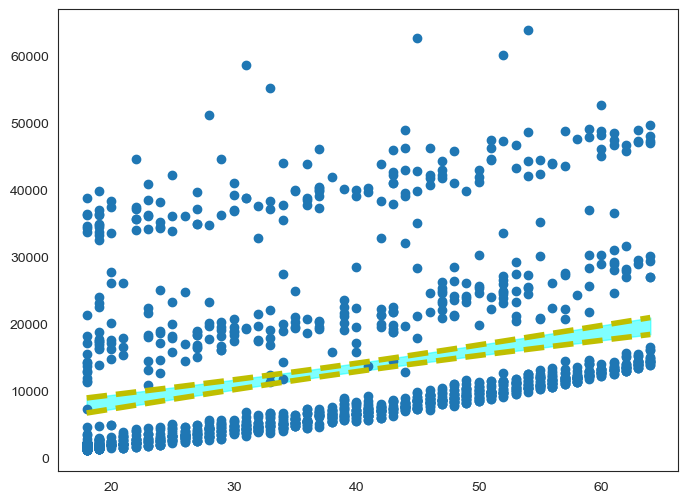

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_low, "y--", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_high, "y--", lw = 4)
ax.fill_between(X_new[:,1], 
                y1 = DF0_fit_confBand_low, 
                y2 = DF0_fit_confBand_high, 
                color='cyan', alpha = 0.5)

In [84]:
import numpy as np
import pandas as pd
from patsy import dmatrices

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

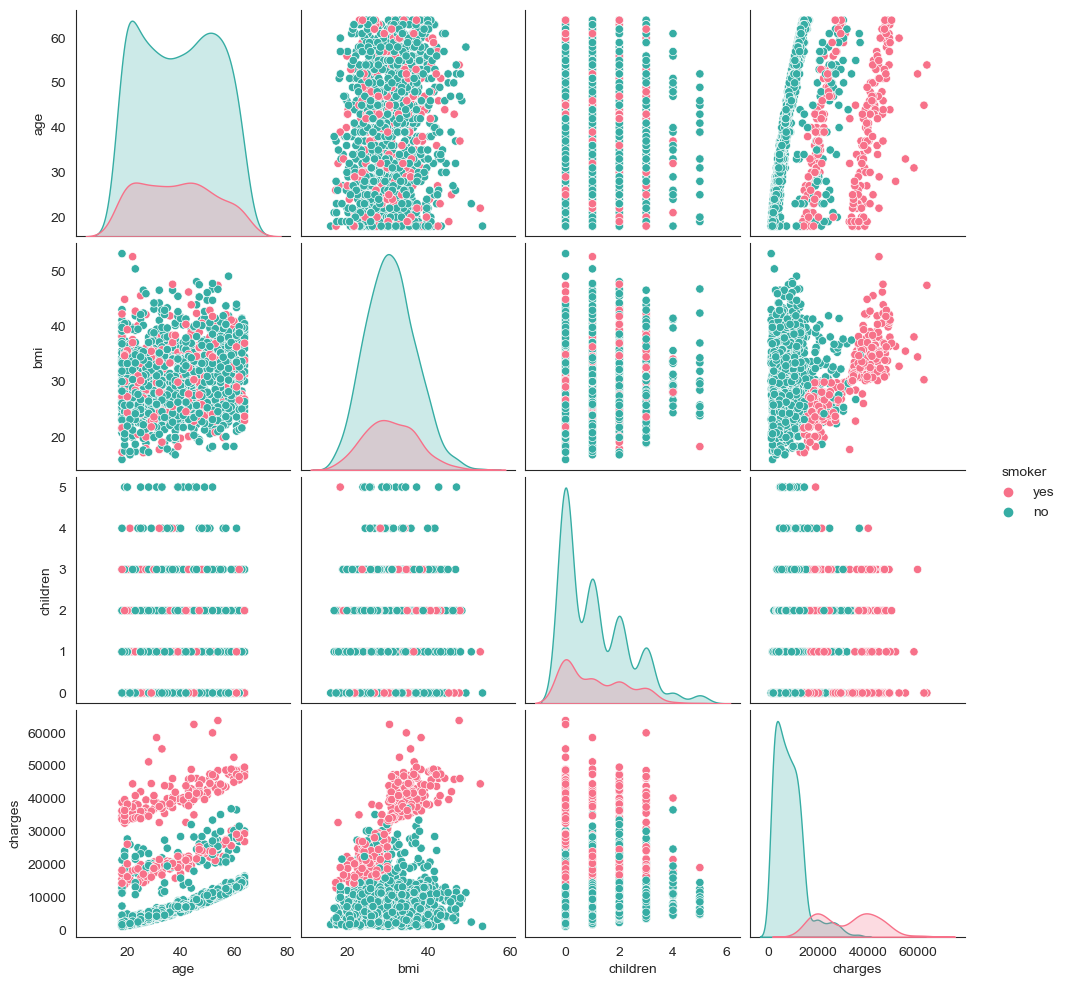

In [57]:
sns.pairplot(data, hue='smoker', palette="husl")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_24968\327542628.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='plasma',vmin=-1, vmax=1 )


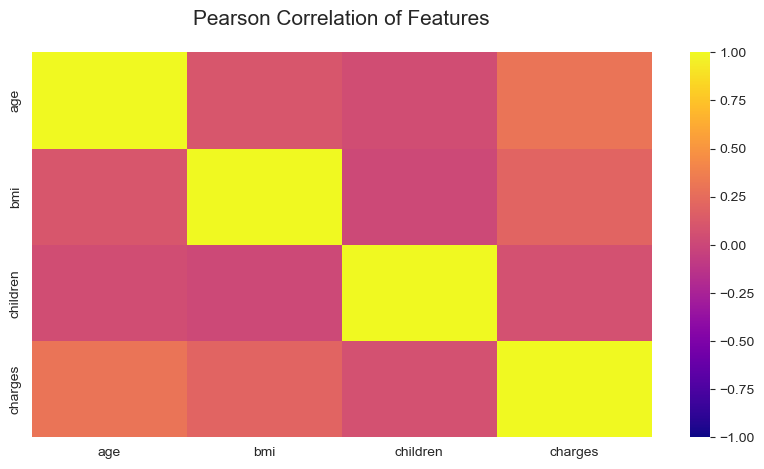

In [58]:
#Correlation Matrix
fig = plt.figure(figsize=[10,5])
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(data.corr(), cmap='plasma',vmin=-1, vmax=1 )
plt.show()

In [60]:
data['children'] = np.log1p(data['children'])

<Axes: >

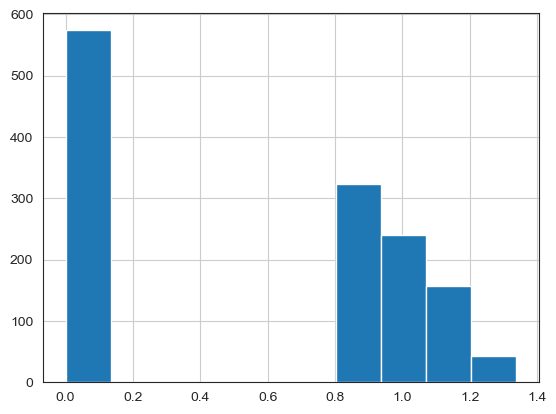

In [61]:
(np.sqrt(data['children'])).hist()

In [63]:
print((data['age']).skew())

0.05567251565299186


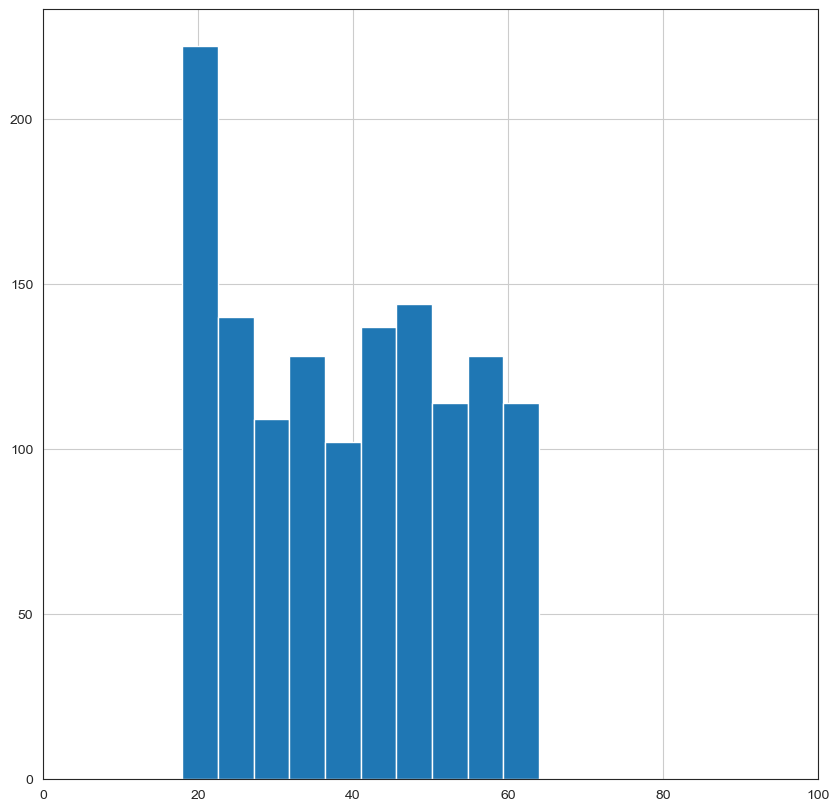

In [64]:
plt.figure(figsize = (10,10))
plt.xlim(0,100)
data.age.hist()
plt.show()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [66]:
ins = pd.get_dummies(data = data, drop_first = True )

In [68]:
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.000000,yes,southwest,16884.92400
1,18,male,33.770,0.693147,no,southeast,1725.55230
2,28,male,33.000,1.386294,no,southeast,4449.46200
3,33,male,22.705,0.000000,no,northwest,21984.47061
4,32,male,28.880,0.000000,no,northwest,3866.85520
5,31,female,25.740,0.000000,no,southeast,3756.62160
6,46,female,33.440,0.693147,no,southeast,8240.58960
7,37,female,27.740,1.386294,no,northwest,7281.50560
8,37,male,29.830,1.098612,no,northeast,6406.41070
9,60,female,25.840,0.000000,no,northwest,28923.13692


In [69]:
data.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,1.098612,yes,southeast,43896.37630
1324,31,male,25.935,0.693147,no,northwest,4239.89265
1325,61,male,33.535,0.000000,no,northeast,13143.33665
1326,42,female,32.870,0.000000,no,northeast,7050.02130
1327,51,male,30.030,0.693147,no,southeast,9377.90470
1328,23,female,24.225,1.098612,no,northeast,22395.74424
1329,52,male,38.600,1.098612,no,southwest,10325.20600
1330,57,female,25.740,1.098612,no,southeast,12629.16560
1331,23,female,33.400,0.000000,no,southwest,10795.93733
1332,52,female,44.700,1.386294,no,southwest,11411.68500


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(ins.drop(columns = ['charges']))

In [71]:
y=data['charges']

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, n_estimators=200)).fit(X_new, y)
X_new = selector.transform(X_new)

In [73]:
X_new = pd.DataFrame(data= X_new)

In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth =3, random_state=0)
scores = cross_val_score(regressor, X_new, y, cv=5)
scores

array([0.8782583 , 0.78176659, 0.88089714, 0.82756408, 0.85377766])

In [77]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)


scores = cross_val_score(neigh, X_new, y, cv=5)
scores

array([0.88149772, 0.7882861 , 0.86911736, 0.82162405, 0.84470545])

In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

scores = cross_val_score(reg, X_new, y, cv=5)
scores

array([0.76172245, 0.70978635, 0.77205988, 0.72830177, 0.75328122])

In [79]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=.1)

scores = cross_val_score(clf, X_new, y, cv=5)
scores

array([0.76172371, 0.70979568, 0.77204929, 0.72830766, 0.75327788])

In [80]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( n_estimators=200, max_depth=2, random_state=0)

scores = cross_val_score(regr, X_new, y, cv=5)
scores

array([0.85183238, 0.77526516, 0.85704306, 0.81878117, 0.83151184])

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
clfg = GradientBoostingRegressor(n_estimators=200, max_depth=2,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
scores = cross_val_score(clfg, X_new, y, cv=5)
scores

array([0.88035398, 0.79993044, 0.88483938, 0.84347372, 0.85560934])

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(learning_rate=0.5, random_state=0, n_estimators=200)
scores = cross_val_score(ada, X_new, y, cv=5)
scores

array([0.8405355 , 0.76596061, 0.83685099, 0.79613934, 0.82440357])

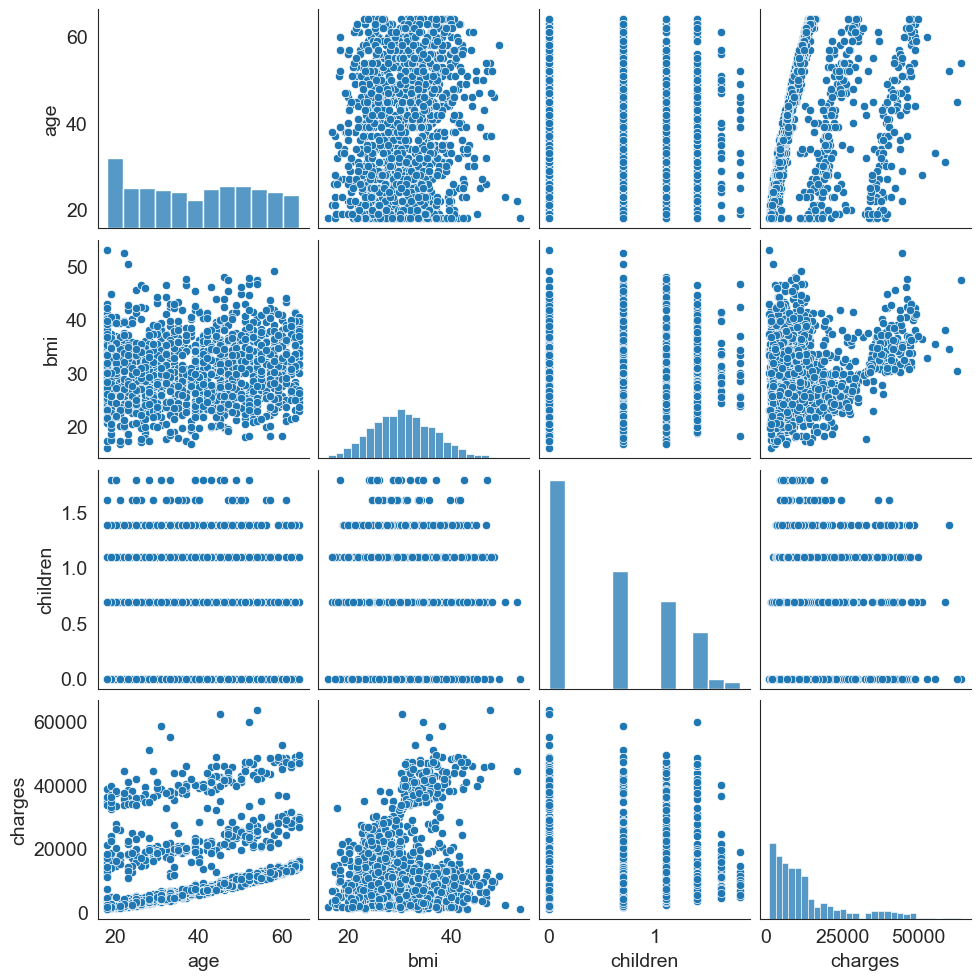

In [85]:
# plot numerical data as pairs
sns.pairplot(data);

# Multinomial logistic regression

In [107]:
from sklearn.model_selection import train_test_split
X = d.drop(['risk','charges'],1)
y = d['risk']
#split the data to train and test sets(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\asus\AppData\Local\Temp\ipykernel_24968\2982538435.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = d.drop(['risk','charges'],1)


In [108]:
# Train the logistic model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

# Prediction and Evaluation

In [109]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       281
           1       0.92      0.46      0.61        74
           2       0.93      0.91      0.92        47

    accuracy                           0.89       402
   macro avg       0.91      0.79      0.82       402
weighted avg       0.89      0.89      0.87       402



The overall accuracy is 88%

# Linear Regression

In [110]:
X = d.drop(['risk','charges'],1)
y = d['charges']
#split the data to train and test sets(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\asus\AppData\Local\Temp\ipykernel_24968\3847238469.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = d.drop(['risk','charges'],1)


In [111]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [112]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # p.165
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13016.927242833333
MSE: 316050749.4721553
RMSE: 17777.816217751697


In [118]:
print('R^2:',r2_score(y_test, predictions_risk))

R^2: 0.9249557505497237



# Use risk level as one of the predictors.

In [114]:
X = d.drop(['charges'],1)
y = d['charges']
#split the data to train and test sets(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm_risk = LinearRegression()
lm_risk.fit(X_train,y_train)
predictions_risk = lm_risk.predict(X_test)

C:\Users\asus\AppData\Local\Temp\ipykernel_24968\2246920033.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = d.drop(['charges'],1)


In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_risk)) # p.165
print('MSE:', metrics.mean_squared_error(y_test, predictions_risk))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_risk)))

MAE: 2200.0286326864734
MSE: 11003311.137080923
RMSE: 3317.123925493427


In [117]:
from sklearn.metrics import r2_score
print('R^2:',r2_score(y_test, predictions_risk))

R^2: 0.9249557505497237


We got a 0.89 R^2 without even a hard try!